## Black Friday Purchase EDA


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.****


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/msarvesh/black-friday-sales-prediction
- The data consists of 12 column and 500000+ rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [92]:
df = pd.read_csv('data/train.csv')

#### Show Top 5 Records

In [93]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


#### Shape of the dataset

In [94]:
df.shape

(550068, 12)

### 2.2 Dataset information

# Dataset Features Description

---
1. User_ID  
**Type:** Categorical (Unique Identifier)  
**Description:** Unique ID for each customer.  
**Relevance:** Not useful for modeling (high cardinality). Drop this column before training.

---

2. Product_ID  
**Type:** Categorical (Unique Identifier)  
**Description:** Unique ID for each product purchased.  
**Relevance:** Typically dropped (too many unique values). However, you could engineer features like *total purchases per product* if needed.

---

3. Gender  
**Type:** Categorical (Binary: M/F)  
**Description:** Customer’s gender.  
**Relevance:** Strong predictor. Encode as:  
- `Gender_M`: 1 for Male, 0 for Female.  
(Or use `LabelEncoder`).

---

4. Age  
**Type:** Categorical (Ordinal)  
**Description:** Age group of the customer (e.g., 0-17, 18-25, ..., 55+).  
**Relevance:** Critical for segmentation. Encode numerically (e.g., 0-17 → 0, 18-25 → 1, etc.).

---

5. Occupation  
**Type:** Categorical (Numeric Codes)  
**Description:** Occupation category of the customer (encoded as integers).  
**Relevance:** May correlate with purchasing power. Use one-hot encoding or embeddings.

---

6. City_Category  
**Type:** Categorical (Nominal: A, B, C)  
**Description:** Tier of the city where the customer lives.  
**Relevance:** Affects purchasing behavior. One-hot encode (e.g., `City_A`, `City_B`, `City_C`).

---

7. Stay_In_Current_City_Years  
**Type:** Categorical (Ordinal)  
**Description:** How long the customer has lived in their current city (e.g., 0, 1, 2, 3, 4+).  
**Relevance:** Longer stay may indicate loyalty. Replace `4+` with `4` and convert to integer.

---

8. Marital_Status  
**Type:** Binary (0 = Single, 1 = Married)  
**Description:** Whether the customer is married.  
**Relevance:** Married customers may buy family-oriented products. Keep as-is.

---

9. Product_Category_1  
**Type:** Categorical (Numeric)  
**Description:** Primary category of the purchased product (e.g., electronics, clothing).  
**Relevance:** Directly impacts purchase amount. Use as-is or one-hot encode.

---

10. Product_Category_2  
**Type:** Categorical (Numeric)  
**Description:** Secondary product category (if applicable).  
**Relevance:** Fill missing values with 0 ("no secondary category").

---

11. Product_Category_3  
**Type:** Categorical (Numeric)  
**Description:** Tertiary product category (if applicable).  
**Relevance:** Fill missing values with 0 ("no tertiary category").

---

12. Purchase (Target Variable)  
**Type:** Continuous Numeric  
**Description:** Total purchase amount (in rupees or dollars).  
**Relevance:** This is what your model will predict!


### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [95]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [96]:
df.duplicated().sum()

0

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [97]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


### 3.4 Checking the number of unique values of each column

In [98]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

In [99]:
# Drop 'Product_ID'
df = df.drop(['User_ID'], axis=1)

### 3.5 Check statistics of data set

In [100]:
df.describe()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


#### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score  0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

### 3.7 Exploring Data

In [101]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


## Handeling Missing Values

In [102]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 6 numerical features : ['Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']

We have 5 categorical features : ['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']


In [103]:
# Numerical features
num_features = ['Occupation', 'Marital_Status', 'Product_Category_1',
                'Product_Category_2', 'Product_Category_3', 'Purchase']

# Categorical features
cat_features = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

print("Categorical feature categories:\n")
for col in cat_features:
    print(f"{col}: {df[col].unique()}")

print("\nNumerical feature ranges:\n")
for col in num_features:
    print(f"{col}: min={df[col].min()}, max={df[col].max()}")

Categorical feature categories:

Gender: ['F' 'M']
Age: ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
City_Category: ['A' 'C' 'B']
Stay_In_Current_City_Years: ['2' '4+' '3' '1' '0']

Numerical feature ranges:

Occupation: min=0, max=20
Marital_Status: min=0, max=1
Product_Category_1: min=1, max=20
Product_Category_2: min=2.0, max=18.0
Product_Category_3: min=3.0, max=18.0
Purchase: min=12, max=23961


In [104]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 6 numerical features : ['Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']

We have 5 categorical features : ['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']


In [105]:
df.head(2)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


In [106]:
# Handelling Missing Values for NUMERICAL FEATURES
# Step-1 : Make a list of features with missing values
numerical_features_with_null = [feature for feature in df.columns if df[feature].isnull().sum() > 1 and df[feature].dtype != 'object']

# Step-2: Print the percentage of missing values for each feature
for feature in numerical_features_with_null:
    print('{}: {}% missing values'.format(feature, np.round(df[feature].isnull().mean(), 4)))

Product_Category_2: 0.3157% missing values
Product_Category_3: 0.6967% missing values


In [107]:
for feature in numerical_features_with_null:
    # Replace missing values with the median (good for handling outliers)
    median_value = df[feature].median()
    df[feature].fillna(median_value, inplace=True)

# Optional: Check that nulls are removed
print(df[numerical_features_with_null].isnull().sum())

Product_Category_2    0
Product_Category_3    0
dtype: int64


In [108]:
df.head(2)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,9.0,14.0,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


#####  Insights
 - From above values we get students have performed the worst in Maths 
 - Best performance is in reading section

### 4. Exploring Data ( Visualization )

#### 4.1.1 Histogram & KDE

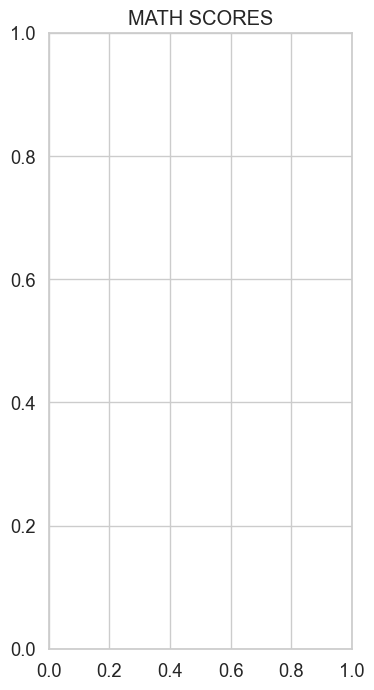

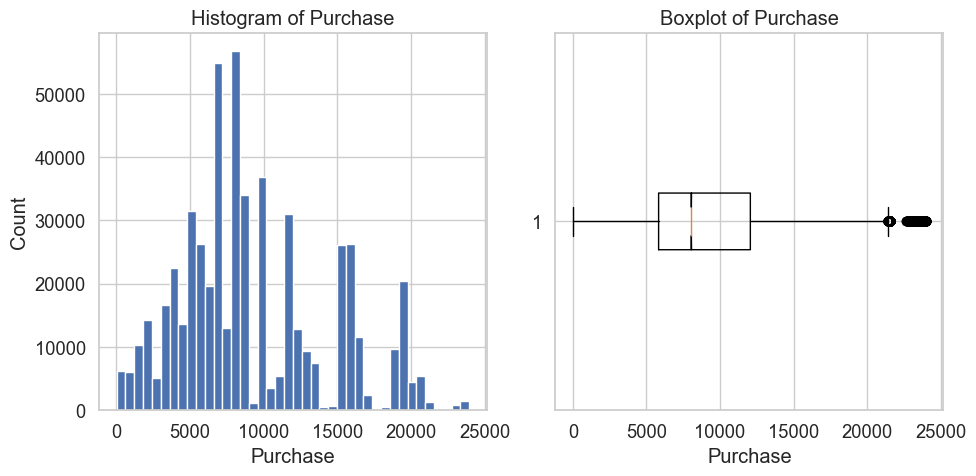

In [109]:
# Ensure product categories are numeric (they sometimes have NaNs)
for c in ['Product_Category_1','Product_Category_2','Product_Category_3']:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

# 1) Histogram + boxplot of Purchase
if 'Purchase' in df.columns:
    plt.figure(figsize=(10,5))
    # Histogram
    plt.subplot(1,2,1)
    plt.hist(df['Purchase'].dropna(), bins=40)
    plt.title("Histogram of Purchase")
    plt.xlabel("Purchase")
    plt.ylabel("Count")
    # Boxplot
    plt.subplot(1,2,2)
    plt.boxplot(df['Purchase'].dropna(), vert=False, notch=True)
    plt.title("Boxplot of Purchase")
    plt.xlabel("Purchase")
    plt.tight_layout()
    plt.show()

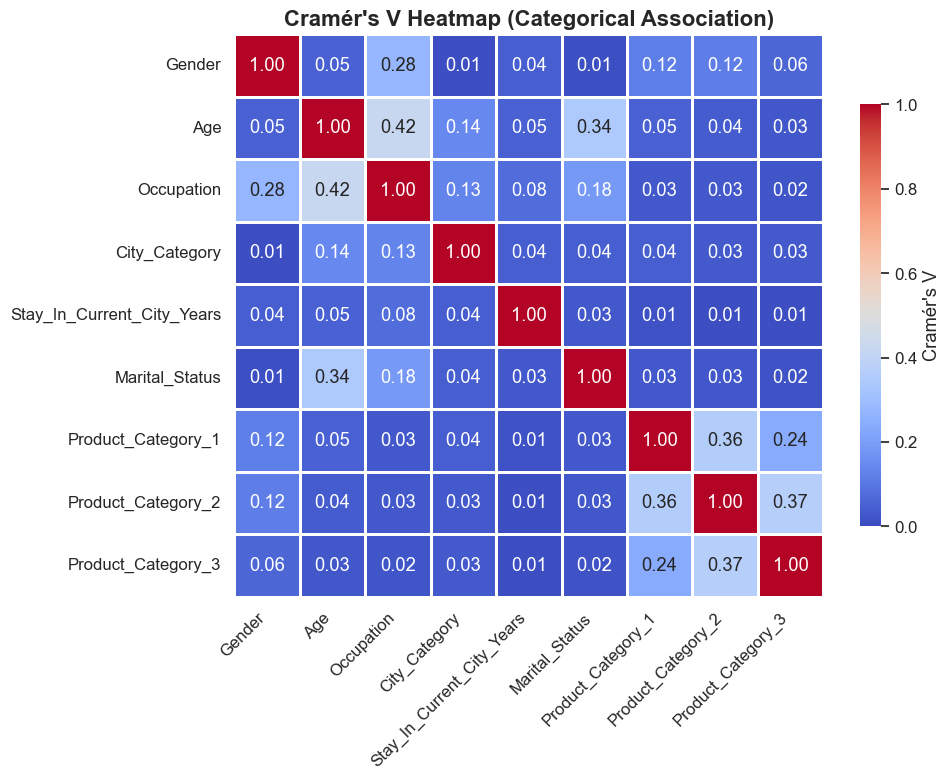

In [126]:
import math
from scipy import stats

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix, correction=False)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    denom = min((kcorr-1), (rcorr-1))
    if denom == 0:
        return 0.0
    return math.sqrt(phi2corr / denom)

cat_features = [c for c in ['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years',
                            'Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3'] if c in df.columns]

if len(cat_features) >= 2:
    m = pd.DataFrame(index=cat_features, columns=cat_features, dtype=float)
    for i in cat_features:
        for j in cat_features:
            try:
                m.loc[i,j] = cramers_v(df[i].fillna("NA"), df[j].fillna("NA"))
            except Exception:
                m.loc[i,j] = np.nan

    plt.figure(figsize=(10, 8))
    sns.heatmap(
        m.astype(float), 
        annot=True, 
        fmt=".2f", 
        cmap="coolwarm", 
        vmin=0, vmax=1, 
        linewidths=0.8, 
        linecolor='white',
        cbar_kws={"shrink": 0.75, "label": "Cramér's V"}
    )
    plt.title("Cramér's V Heatmap (Categorical Association)", fontsize=16, weight='bold')
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

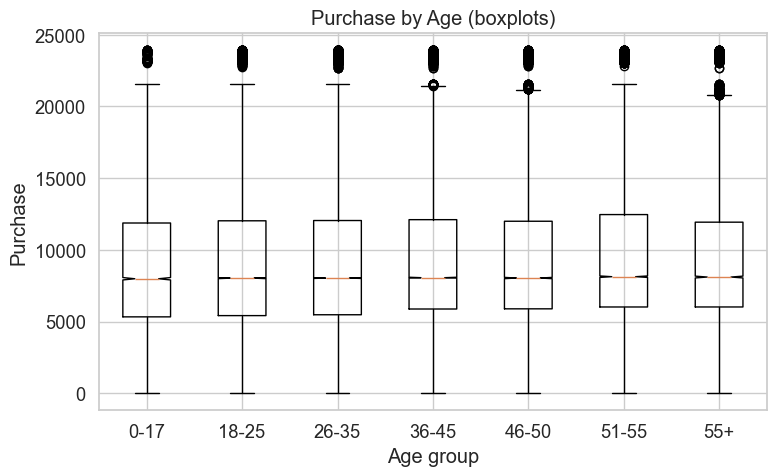

In [110]:
# 2) Boxplot of Purchase by Age
if 'Purchase' in df.columns and 'Age' in df.columns:
    groups = df.groupby('Age')['Purchase'].apply(list)
    labels = groups.index.tolist()
    data = [groups[l] for l in labels]
    plt.figure(figsize=(8,5))
    plt.boxplot(data, labels=labels, notch=True)
    plt.title("Purchase by Age (boxplots)")
    plt.xlabel("Age group")
    plt.ylabel("Purchase")
    plt.tight_layout()
    plt.show()

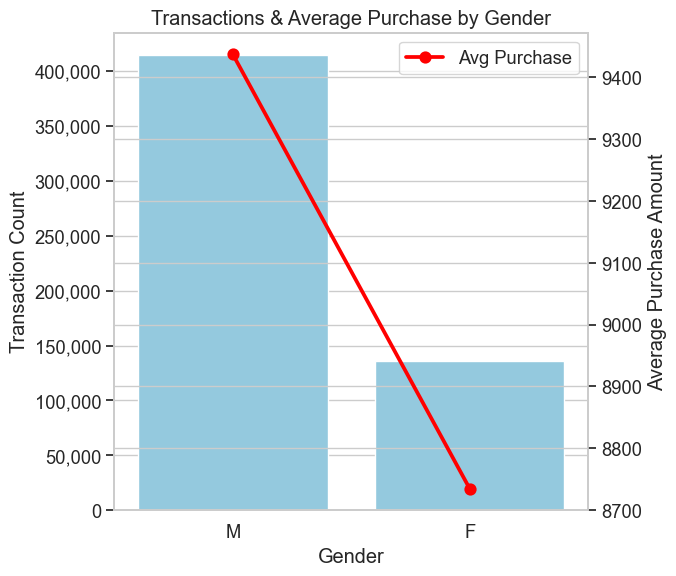

In [111]:
import matplotlib.ticker as mticker

# Count of rows (transactions) per gender
gender_count = df['Gender'].value_counts().reset_index()
gender_count.columns = ['Gender', 'Count']

# Average purchase amount per gender
avg_purchase = df.groupby('Gender')['Purchase'].mean().reset_index()
avg_purchase.columns = ['Gender', 'AvgPurchase']

# Merge
gender_stats = gender_count.merge(avg_purchase, on='Gender')

# Plot
fig, ax1 = plt.subplots(figsize=(7, 6))

# Bar plot for transaction count
sns.barplot(data=gender_stats, x='Gender', y='Count', ax=ax1, color='skyblue')
ax1.set_ylabel('Transaction Count')
ax1.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))  # commas

# Second axis for average purchase
ax2 = ax1.twinx()
sns.pointplot(data=gender_stats, x='Gender', y='AvgPurchase', ax=ax2, color='red', marker='o', label='Avg Purchase')
ax2.set_ylabel('Average Purchase Amount')

# Title
plt.title('Transactions & Average Purchase by Gender')
plt.tight_layout()
plt.show()

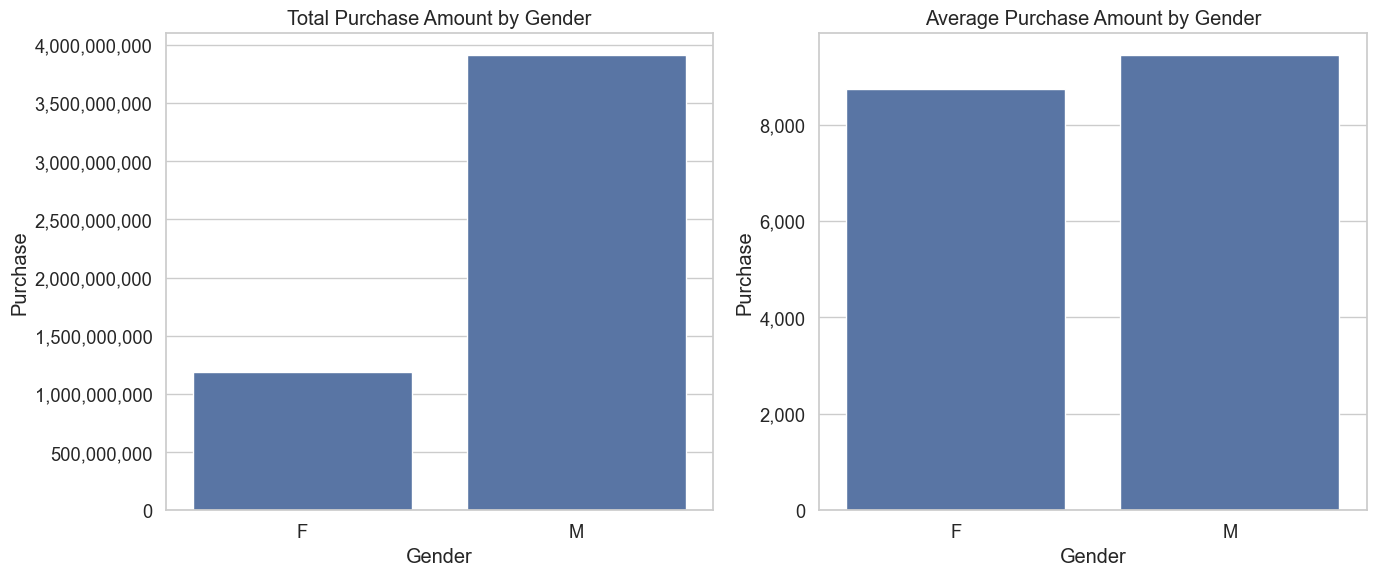

In [112]:
# Recalculate if needed
total_purchase = df.groupby('Gender')['Purchase'].sum().reset_index()
avg_purchase = df.groupby('Gender')['Purchase'].mean().reset_index()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Total purchase bar plot
sns.barplot(data=total_purchase, x='Gender', y='Purchase', ax=axes[0])
axes[0].set_title('Total Purchase Amount by Gender')
axes[0].yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Average purchase bar plot
sns.barplot(data=avg_purchase, x='Gender', y='Purchase', ax=axes[1])
axes[1].set_title('Average Purchase Amount by Gender')
axes[1].yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()

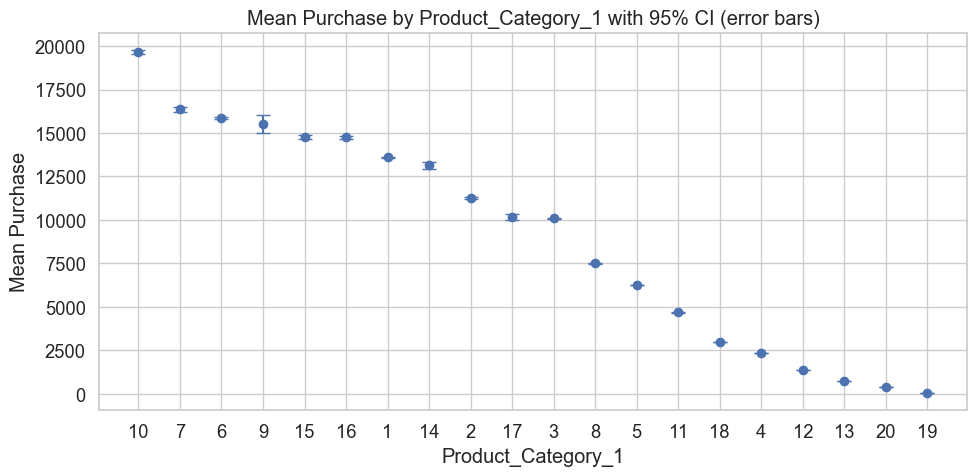

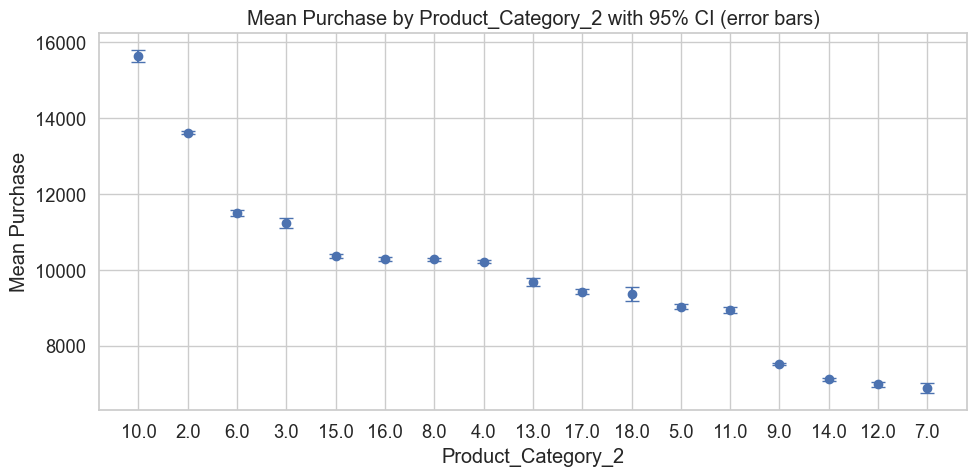

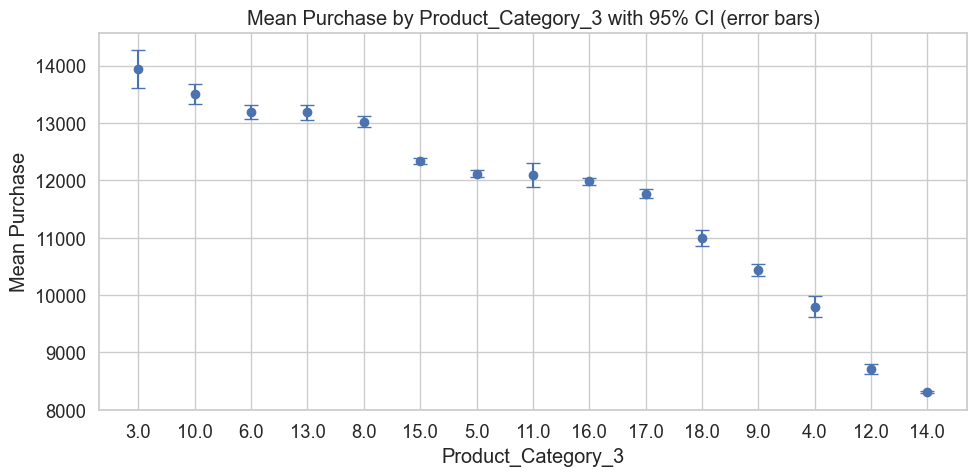

In [113]:
import math
from scipy import stats

category_cols = ['Product_Category_1', 'Product_Category_2', 'Product_Category_3']

for col in category_cols:
    if col in df.columns and 'Purchase' in df.columns:
        grp = df.groupby(col)['Purchase']
        means = grp.mean()
        counts = grp.count()
        stds = grp.std()
        
        # 95% CI using t-distribution
        cis = []
        for m, c, s in zip(means, counts, stds):
            if c > 1 and not np.isnan(s):
                se = s / math.sqrt(c)
                t = stats.t.ppf(0.975, c-1)
                cis.append(t * se)
            else:
                cis.append(np.nan)

        order = means.sort_values(ascending=False).index

        plt.figure(figsize=(10,5))
        plt.errorbar(
            x=np.arange(len(order)),
            y=means.loc[order].values,
            yerr=np.array(cis)[np.argsort(-means.values)],
            fmt='o', capsize=5
        )
        plt.xticks(np.arange(len(order)), order)
        plt.title(f"Mean Purchase by {col} with 95% CI (error bars)")
        plt.xlabel(col)
        plt.ylabel("Mean Purchase")
        plt.tight_layout()
        plt.show()


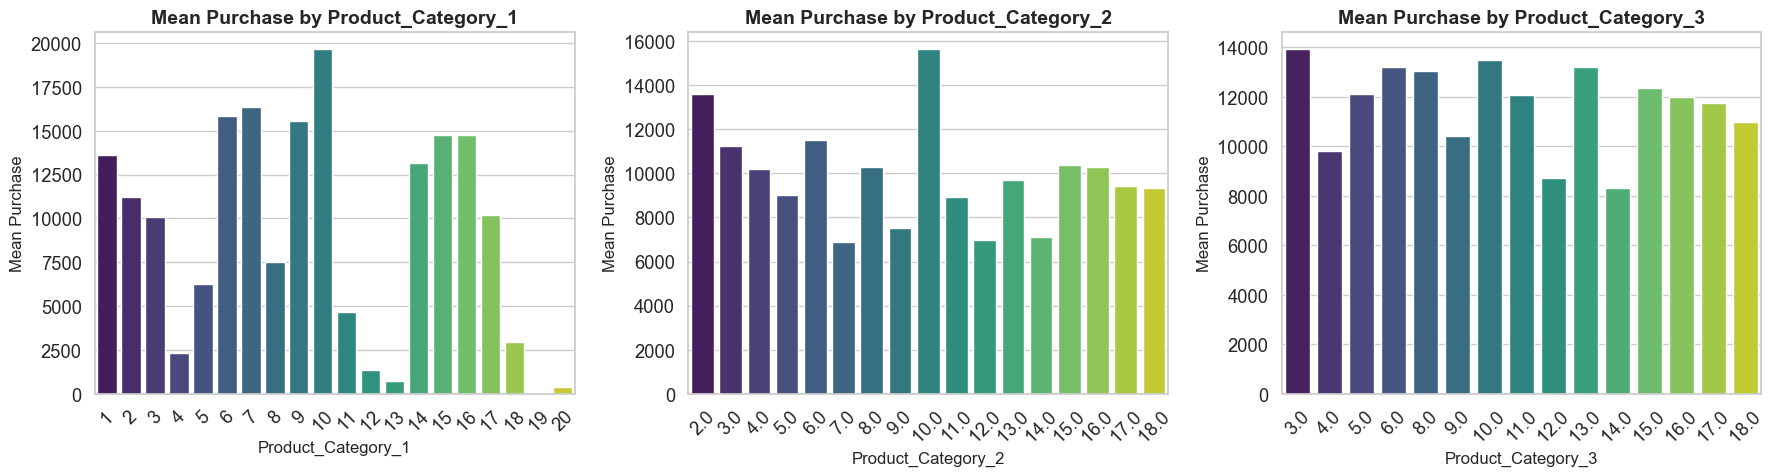

In [114]:
categories = ['Product_Category_1', 'Product_Category_2', 'Product_Category_3']

plt.figure(figsize=(18, 5))

for i, cat in enumerate(categories, 1):
    if cat in df.columns and 'Purchase' in df.columns:
        # Aggregate mean Purchase for each category value
        pivot = df.groupby(cat)['Purchase'].mean().reset_index()

        plt.subplot(1, 3, i)
        sns.barplot(data=pivot, x=cat, y='Purchase', palette="viridis")

        plt.title(f"Mean Purchase by {cat}", fontsize=14, weight='bold')
        plt.xlabel(cat, fontsize=12)
        plt.ylabel('Mean Purchase', fontsize=12)
        plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


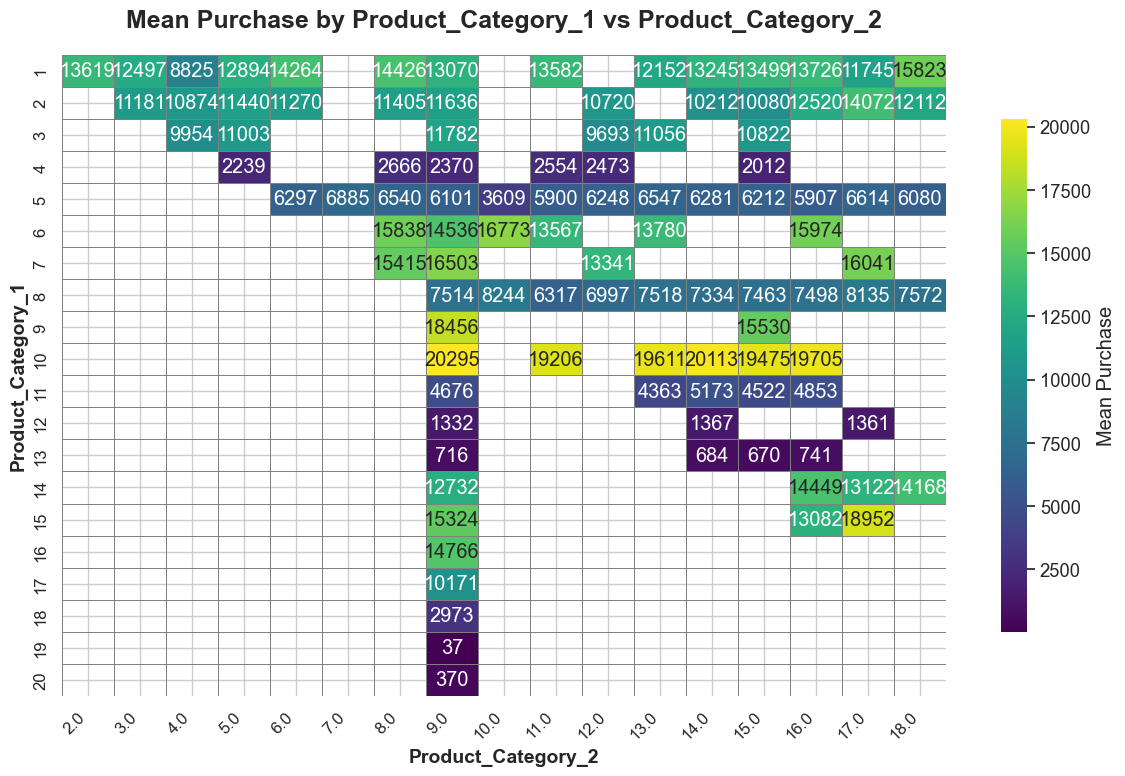

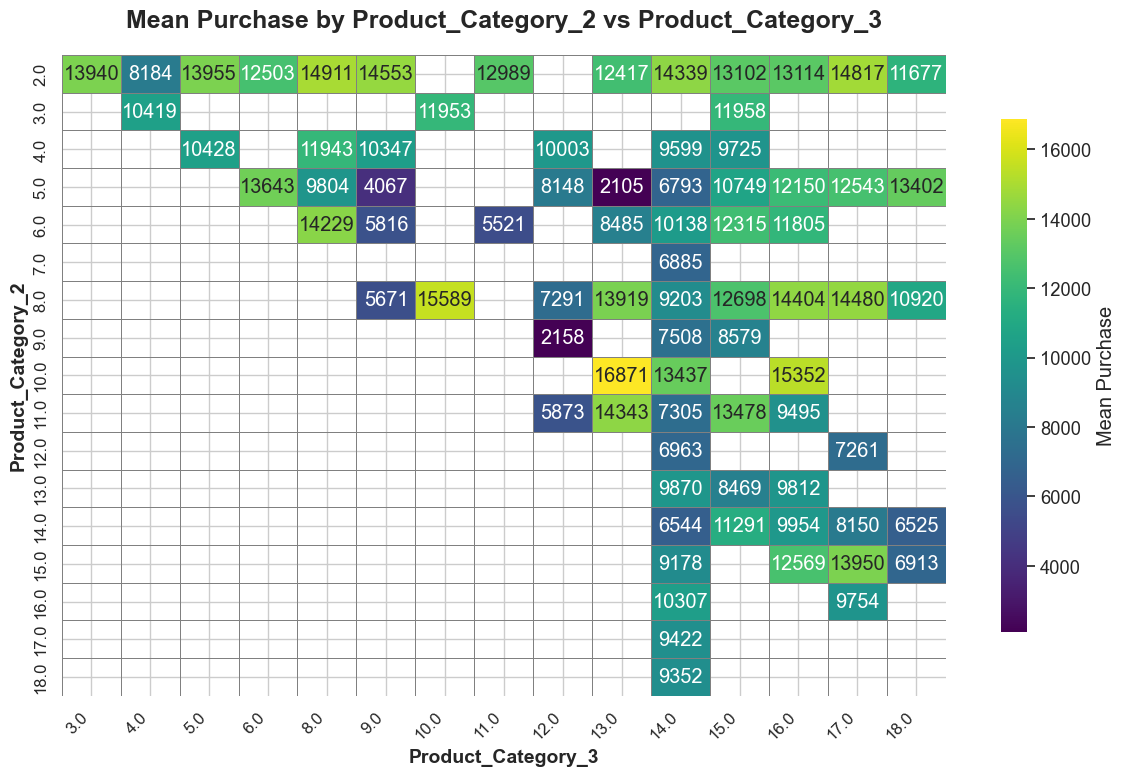

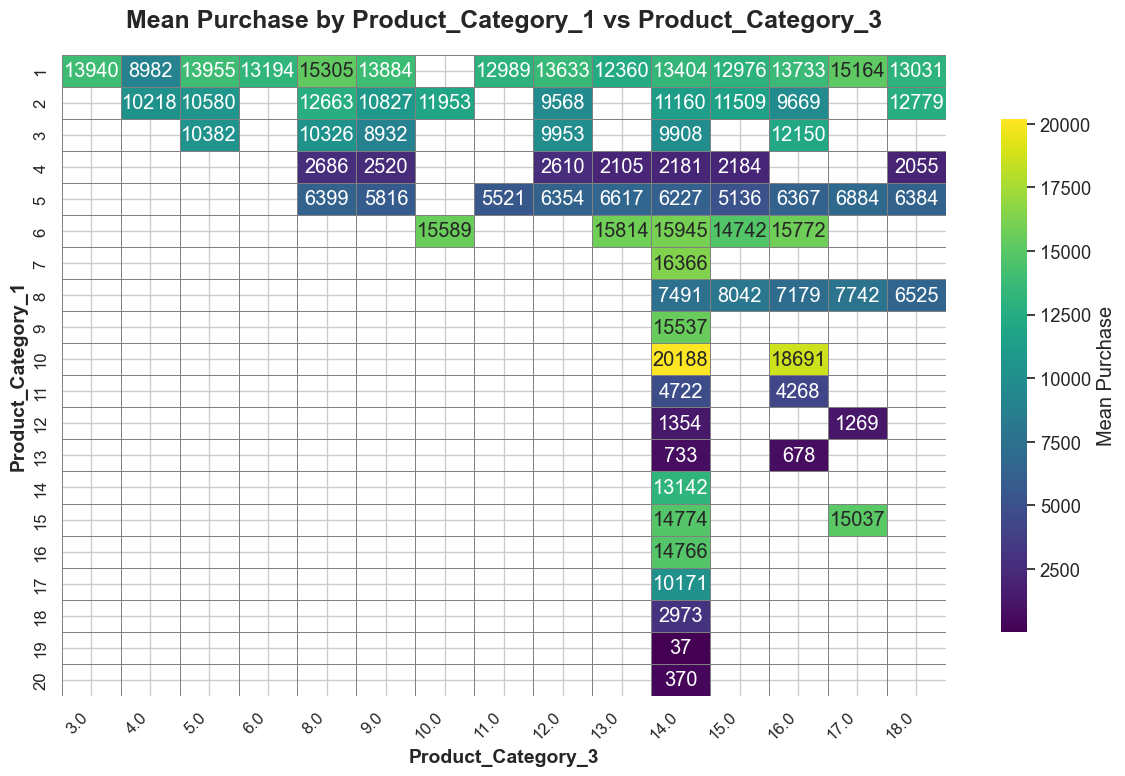

In [115]:
pairs = [
    ('Product_Category_1', 'Product_Category_2'),
    ('Product_Category_2', 'Product_Category_3'),
    ('Product_Category_1', 'Product_Category_3')
]

for cat1, cat2 in pairs:
    if cat1 in df.columns and cat2 in df.columns and 'Purchase' in df.columns:
        pivot = df.pivot_table(
            index=cat1,
            columns=cat2,
            values='Purchase',
            aggfunc='mean'
        )

        plt.figure(figsize=(12, 8))
        sns.heatmap(
            pivot,
            annot=True,
            fmt=".0f",
            cmap="viridis",
            linewidths=0.5,
            linecolor='gray',
            cbar_kws={'label': 'Mean Purchase', 'shrink': 0.8}
        )
        plt.title(f"Mean Purchase by {cat1} vs {cat2}", fontsize=18, weight='bold', pad=20)
        plt.xlabel(cat2, fontsize=14, weight='bold')
        plt.ylabel(cat1, fontsize=14, weight='bold')
        plt.xticks(rotation=45, ha='right', fontsize=12)
        plt.yticks(fontsize=12)
        plt.tight_layout()
        plt.show()

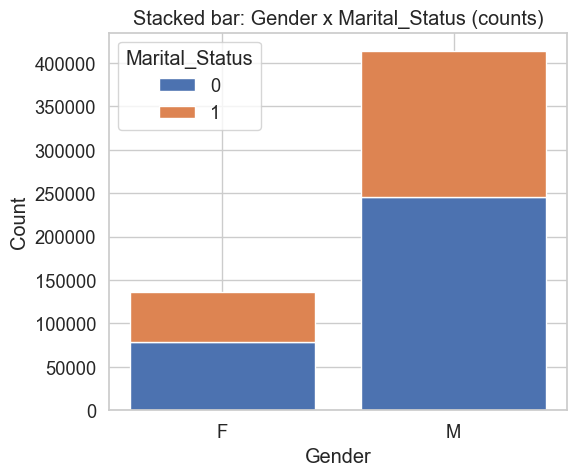

In [116]:
# 6) Stacked bar for Gender x Marital_Status (counts)
if {'Gender','Marital_Status'}.issubset(df.columns):
    ct = pd.crosstab(df['Gender'], df['Marital_Status'])
    labels = ct.index.tolist()
    categories = ct.columns.tolist()
    bottoms = np.zeros(len(labels))
    x = np.arange(len(labels))
    plt.figure(figsize=(6,5))
    for col in categories:
        vals = ct[col].values
        plt.bar(x, vals, bottom=bottoms)
        bottoms += vals
    plt.xticks(x, labels)
    plt.title("Stacked bar: Gender x Marital_Status (counts)")
    plt.xlabel("Gender")
    plt.ylabel("Count")
    plt.legend(categories, title='Marital_Status')
    plt.tight_layout()
    plt.show()

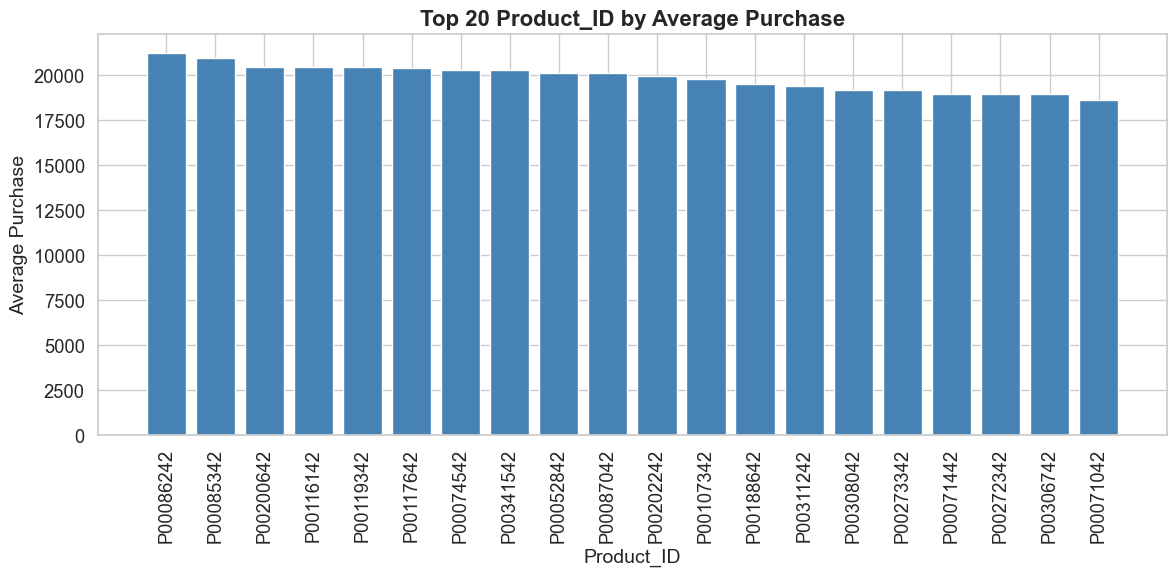

In [117]:
import matplotlib.pyplot as plt
import numpy as np

if 'Product_ID' in df.columns and 'Purchase' in df.columns:
    prod_stats = df.groupby('Product_ID')['Purchase'].agg(['mean','count','sum']).sort_values('mean', ascending=False)
    top20 = prod_stats.head(20)

    if not top20.empty:
        plt.figure(figsize=(12, 6))
        plt.bar(top20.index, top20['mean'], color='steelblue')
        plt.xticks(rotation=90)
        plt.title("Top 20 Product_ID by Average Purchase", fontsize=16, weight='bold')
        plt.xlabel("Product_ID", fontsize=14)
        plt.ylabel("Average Purchase", fontsize=14)
        plt.tight_layout()
        plt.show()
    else:
        print("No data in top20 to plot.")
else:
    print("Columns Product_ID or Purchase not found in DataFrame.")

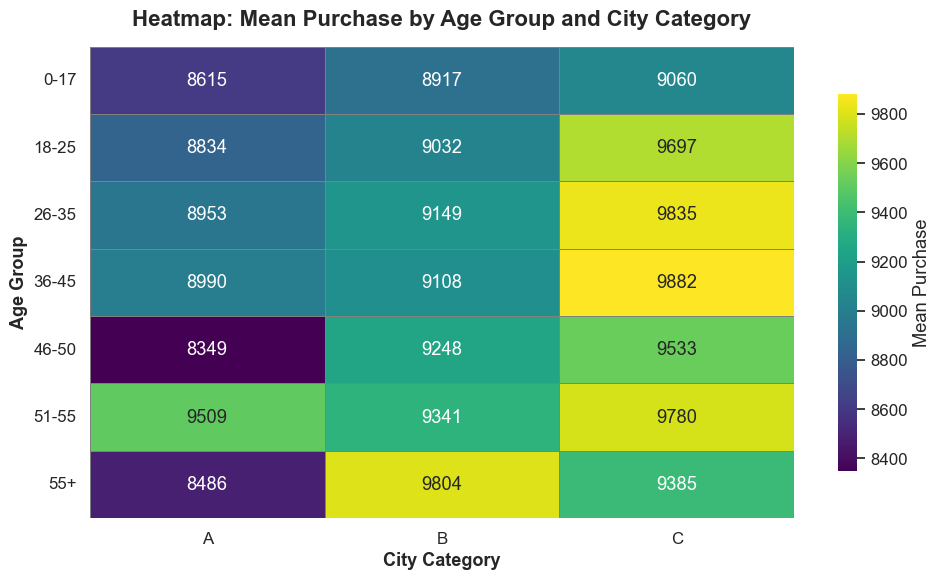

In [121]:
if {'Age', 'City_Category', 'Purchase'}.issubset(df.columns):
    pivot2 = df.pivot_table(index='Age', columns='City_Category', values='Purchase', aggfunc='mean')
    
    plt.figure(figsize=(10, 6))
    sns.set_theme(style="whitegrid", font_scale=1.1)
    
    ax = sns.heatmap(
        pivot2, 
        annot=True, 
        fmt=".0f", 
        cmap="viridis", 
        linewidths=0.5, 
        linecolor='gray',
        cbar_kws={'label': 'Mean Purchase', 'shrink': 0.8}
    )
    
    plt.title("Heatmap: Mean Purchase by Age Group and City Category", fontsize=16, weight='bold', pad=15)
    plt.xlabel("City Category", fontsize=13, weight='bold')
    plt.ylabel("Age Group", fontsize=13, weight='bold')
    plt.xticks(rotation=0)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

#### Converting the cleaned data into csv

In [127]:
df = df.drop(['Product_ID'], axis=1)

In [128]:
df.to_csv('cleaned_data.csv', index=False)